<a href="https://colab.research.google.com/github/Thiagogiovanni/projetos_de_estudo/blob/main/projetoairbnb_rio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Rio de Janeiro

O [Airbnb](https://www.airbnb.com.br/) é conhecido mundialmente, sendo **maior empresa hoteleira do mundo**, porém não possuindo **nenhum** hotel. Conectando de forma prática, pessoas que querem viajar com anfitriões que querem alugar seus imóveis, o **Airbnb** fornece uma plataforma inovadora para tornar tal processo mais fácil.

Mesmo com a pandemia impactando seriamente seus negócios, o número de imóveis disponíveis para aluguel da Airbnb mais do que dobrou nos últimos quatro anos, possuindo 63% a mais de unidades disponíveis para aluguel do que as redes de hotéis Marriott, Hilton e IHG, juntas.

Uma das iniciativas do Airbnb é disponibilizar seus dados em seu site. Por meio do portal [Inside Airbnb](http://insideairbnb.com/) é possível baixar uma grande quantidade de dados para desenvolvler projetos.


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



**Nesse notebook, iremos anallisar dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**


# **Obtenção dos Dados**



Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/).

Para essa análise inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Date Compiled: 21 September, 2022*


In [4]:
# importando os pacotes que serão utilizados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2022-09-21/visualisations/listings.csv")

# **Análise dos Dados**

Essa parte tem como objetivo se familiarizar com a forma que os dados estão estruturados

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews nos últimos 12 meses
* `license` - licença do imóvel

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.


In [8]:
# Mostrando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,53344884,Suntuoso apartamento em Copacabana posto 6,431412286,Carlos Henrique,NaN,Copacabana,-22.98299,-43.18904,Entire home/apt,3500,3,0,NaN,NaN,10,365,0,NaN
1,44708736,Aluguel de Lancha no Rio de Janeiro,97164727,Jorge Quito,NaN,Glória,-22.91988,-43.17034,Entire home/apt,8999,1,2,2021-08-02,0.10,2,179,0,NaN
2,7801456,Ipanema Vieira Souto - Linda Vista,40650139,Carlos Alberto,NaN,Ipanema,-22.98723,-43.20452,Entire home/apt,5000,2,0,NaN,NaN,5,365,0,NaN
3,48227858,Ótimo apart-hotel com toda comodidade! ITAGUAÍ!!,387525952,Nelio,NaN,Santa Cruz,-22.87218,-43.76740,Entire home/apt,200,2,4,2021-12-17,0.22,2,356,1,NaN
4,36306164,Porto Real Resort cobertura espetacular,273041807,Andreia,NaN,Santa Cruz,-22.87738,-43.73780,Entire home/apt,636,2,12,2022-03-21,0.55,1,353,4,NaN


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos identificar a quantidade de entradas que nosso conjunto de dados possui, além de ver os tipos para cada coluna.

In [22]:
# identificando o volume de dados do nosso DataFrame

print("Entradas:  {}".format(df.shape[0]))
print("Variáveis: {}\n".format(df.shape[1]))



# verificando o tipo das primeiras entradas

display(df.dtypes)


Entradas:  26366
Variáveis: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Qual porcentagem de valores ausentes no dataset?**:

* É possível notar que as colunas `neighbourhood_group` e `license` possui 100% de seus dados ausentes

* Conseguimos notar que as colunas `reviews_per_month` e `last_review` tem cerca de 26% dos seus dados faltantes.

* Existem alguns pequenos casos de dados faltantes nas colunas `name` e `host_name`

In [23]:
from typing import AsyncContextManager
# ordenando de forma decrescente as variáveis por seus valores ausentes

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.266366
last_review                       0.266366
name                              0.000721
host_name                         0.000190
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Como é a distribuição das variáveis?**

Para responder tal pergunta vamos olhar para os histogramas associados.

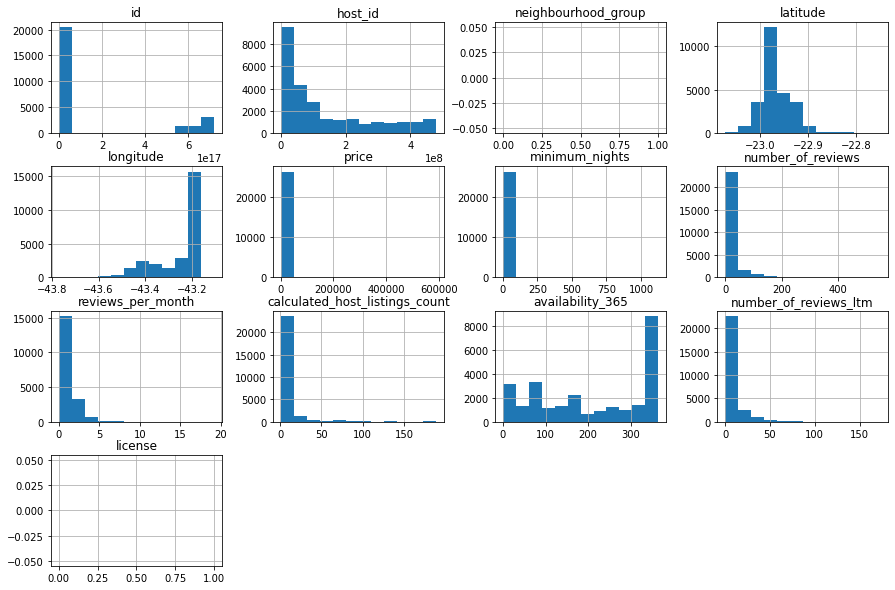

In [25]:
df.hist(bins=12, figsize=(15,10));

### **Há *outliers* presentes?**

Pelos histogramas acima conseguimos ver indícios de *outliers*. Por exemplo, nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`

Os valores nessas variáveis não seguem uma distribuição, por isso acabam distorcendo a representação gráfica.

Para identificar melhor esses *outliers*, usaremos dois métodos:

* Método describe()
* Plotar `boxplots` para a variável

In [27]:
# ver o resumo das variáveis

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,26366.000000,26366.000000,26366.000000,19343.000000,26366.000000,26366.000000,26366.000000
mean,782.525791,5.068156,17.387507,0.964334,8.302966,211.595426,6.000076
std,5265.469954,25.795705,37.456744,1.074740,23.093704,133.446650,10.429095
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,183.000000,1.000000,0.000000,0.170000,1.000000,88.000000,0.000000
50%,303.000000,2.000000,3.000000,0.620000,1.000000,216.000000,1.000000
75%,600.000000,4.000000,16.000000,1.350000,4.000000,357.000000,7.000000
max,590887.000000,1125.000000,549.000000,19.150000,189.000000,365.000000,173.000000


Olhando o resumo acima, podemos confirmar algumas coisas como:

* A variável `price` possui 75% do valor abaixo de 600, porém o valor máximo é 590887.
* A maior quantidade mínima de noites é 1125

#### **Boxplot para minimum_nights** 

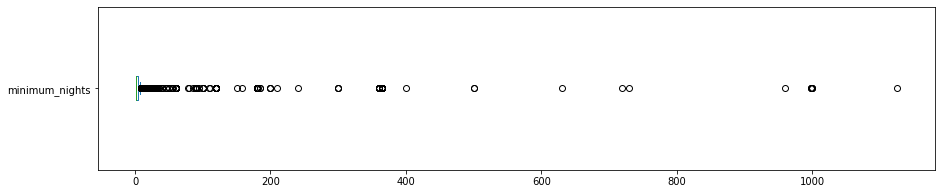


minimum_nights: valores acima de 30: 

241 entradas
Correspondendo a 0.914%


In [57]:
# vamos checar  aquantidade de valores acima de 30 dias para minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("\nminimum_nights: valores acima de 30: \n")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("Correspondendo a {:.3f}%".format((len(df[df.minimum_nights > 30])/df.shape[0]*100)))


#### **Boxplot para price**

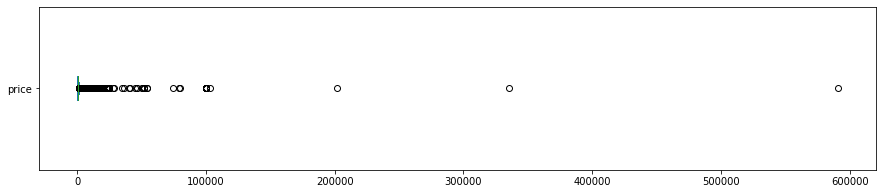


price: valores acima de 1500: 

2022 entradas
Correspondendo a 7.669%


In [58]:
# olhando para a variável price

df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("\nprice: valores acima de 1500: \n")
print("{} entradas".format(len(df[df.price > 1500])))
print("Correspondendo a {:.3f}%".format((len(df[df.price > 1500])/df.shape[0]*100)))

#### **Histograma sem *outliers***

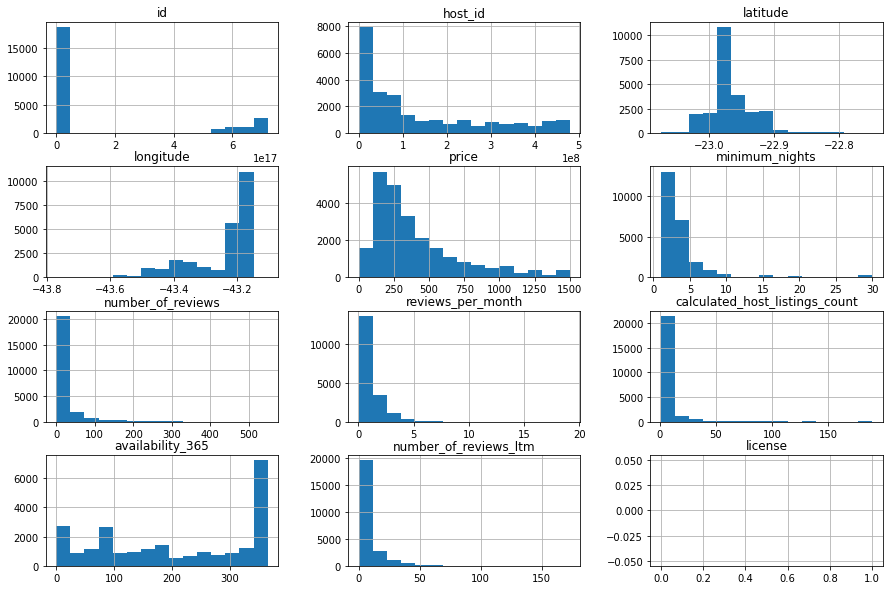

In [59]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

## **Qual tipo de imóvel mais alugado no Airbnb**

Vamos analisar a coluna `room_type`, pois ela indica o tipo de locação que está anunciada.

As opções são apartamentos/casas inteiras, quartos privados, quartos compartilhados e quartos de hotél.

In [60]:
df_clean.room_type.value_counts()

Entire home/apt    18188
Private room        5416
Shared room          480
Hotel room            54
Name: room_type, dtype: int64

In [61]:
# mostrar a porcentagem relacionada aos tipos de imóveis

df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.753501
Private room       0.224377
Shared room        0.019886
Hotel room         0.002237
Name: room_type, dtype: float64

## **Qual localidade mais cara do Rio de Janeiro?**

Para verificar uma variável em função da outra, usaremos a função `groupby()`. No caso, queremos relacionar os bairros(*neighbourhoods*) em função do preço.

In [63]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Caju                      1033.000000
Ricardo de Albuquerque     943.666667
Complexo do Alemão         900.000000
Anchieta                   800.000000
Grumari                    673.800000
Joá                        565.777778
São Conrado                563.075758
Santíssimo                 563.000000
Lagoa                      558.354286
Gericinó                   546.000000
Leblon                     542.087074
Manguinhos                 525.000000
Barra da Tijuca            508.459863
Barros Filho               500.000000
Ipanema                    499.173085
Name: price, dtype: float64

Aqui vemos que alguns bairros como Caju, Ricardo de Albuquerque, Complexo do Alemão e Anchieta estão com a média superior a lugares como Lagoa, Barra da Tijuca e Ipanema.

Uma pessoa que desconhece do Rio poderia apresentar esses dados sem questionar, porém para dar um exemplo, vamos checar a quantidade de anúncios no Caju.

In [64]:
# ver quantidade de imóveis no Caju

print(df_clean[df_clean.neighbourhood == "Caju"].shape)

(1, 17)


In [67]:
# analisando esse único imóvel

df_clean[df_clean.neighbourhood == "Caju"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
12478,38109801,You FYI yonder was that good,35690302,JungHo,Caju,-22.89588,-43.21316,Entire home/apt,1033,1,0,NaN,NaN,1,365,0,NaN


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se **x=longitude** e **y=latitude**.

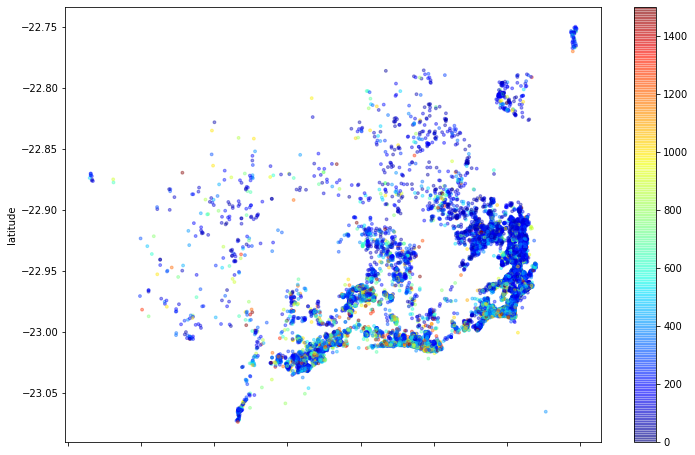

In [68]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

 # **Conclusões**

Foi feita uma análise superficial na base de dados do Airbnb, porém é possível perceber a existência de *outliers* em algumas variáveis.

Além disso, podemos notar que algumas localidades possuem poucos imóveis disponíveis, tornando as informações distorcidas.

Como dito, foi feita uma abordagem superficial, o ideal seria analisar a versão de dados completa com 106 atribuitos disponíveis.